#Importação das bibliotecas


In [123]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


#Load do nosso conjunto de dados


In [124]:
# Carrega o conjunto de dados
pima = pd.read_csv("speedDating_trab.csv")

#Imprime o nosso conjunto de dados


In [125]:
pima

,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1.0,1,21.0,27.0,2.0,7.0,1.0,0.14,2.0,1.0,7.0,6.0,0
1,2,1.0,2,21.0,22.0,2.0,7.0,1.0,0.54,2.0,1.0,7.0,5.0,0
2,3,1.0,3,21.0,22.0,2.0,7.0,1.0,0.16,2.0,1.0,7.0,NaN,1
3,4,1.0,4,21.0,23.0,2.0,7.0,1.0,0.61,2.0,1.0,7.0,6.0,1
4,5,1.0,5,21.0,24.0,2.0,7.0,1.0,0.21,2.0,1.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,22.0,18,25.0,26.0,1.0,2.0,1.0,0.64,1.0,0.0,2.0,5.0,0
8374,8375,22.0,19,25.0,24.0,1.0,2.0,1.0,0.71,1.0,0.0,4.0,4.0,0
8375,8376,22.0,20,25.0,29.0,1.0,2.0,1.0,-0.46,1.0,0.0,6.0,5.0,0
8376,8377,22.0,21,25.0,22.0,1.0,2.0,1.0,0.62,1.0,0.0,5.0,5.0,0


#Vai contar o número de NaN que existe em cada coluna


In [126]:
pima.isnull().sum()


Unnamed: 0      0
id              1
partner         0
age            95
age_o         104
goal           79
date           97
go_out         79
int_corr      158
length        915
met           375
like          240
prob          309
match           0
dtype: int64

#A estratégia para substituir os NaN vai ser a seguinte:
- existe um __id__ a __NaN__ na última posição do nosso conjunto de dados e também verificamos que está ordenado de forma crescente de __id/partner__ então assumimos logo que podemos substituir esse __id__ com o valor __22__;
- coluna __prob__ e __like__ existem valores com __0.0__ quando o seu range só pode ser de __1-10__ do parceiro gostar ou de gostar do parceiro, então nós assumimos que se deu __0__ foi porque não gostou nada, então para ir de encontro com o nosso range, substituímos todos os nossos __0.0__ por __1.0__.  Para tratar do __NaN__ em ambas as colunas, como ambos os atributos são __categóricos ordinais__, normalmente trata-se este atributo como __numérico__ e o processo mais correto para tratar destes valores é com a __média__, então vamos preencher todos os __NaN__ com a __média__ do __prob__ e com a __média__ de __like__ respetivamente;
- Para preencher a __idade (age e age_o)__ como os atributos são __numéricas discretas___ normalmente trata-se destes valores com a __média__ ou com a __mediana__, então, neste caso, nós decidimos usar a __mediana__ para preencher o __NaN__ em ambas as colunas;
- No resto das colunas utilizamos a __moda__ para preencher o __NaN__, porque os atributos no resto das colunas são __categóricos__ e normalmente para atributos __categóricos__, utiliza-se a __moda__ para o preenchimento;
- Depois fizemos a transformação para inteiro de todas as colunas exceto o __prob__, o __like__, o __int_corr__ e o __match__.




In [127]:

#substituimos todos os 0's da coluna prob e like para 1's
pima['prob']=pima['prob'].replace(0.0,1.0)
pima['like']=pima['like'].replace(0.0,1.0)


#o prob e like sao preenchido com a media
gf= pima['prob'].mean()
r= round(gf, 1)
pima['prob'].fillna(value=r,inplace=True)

gf= pima['like'].mean()
r=round(gf, 1)
pima['like'].fillna(value=r,inplace=True)

#os restantes com a moda exceto o age, age_o e id
gf= pima['met'].mode()[0]
pima['met'].fillna(value=gf,inplace=True)

gf= pima['length'].mode()[0]
pima['length'].fillna(value=gf,inplace=True)

gf= pima['int_corr'].mode()
pima['int_corr'].fillna(value=gf,inplace=True)

gf= pima['go_out'].mode()[0]
pima['go_out'].fillna(value=gf,inplace=True)

gf= pima['date'].mode()[0]
pima['date'].fillna(value=gf,inplace=True)

gf= pima['goal'].mode()[0]
pima['goal'].fillna(value=gf,inplace=True)

#para age e age_o faz-se a mediana
gf= pima['age_o'].median()
pima['age_o'].fillna(value=gf,inplace=True)

gf= pima['age'].median()
pima['age'].fillna(value=gf,inplace=True)

#aqui preenche o unico id a NaN por 22
pima['id'].fillna(value=22,inplace=True)




#Convertemos todas as colunas exceto o partner, o prob, o like e o match para inteiro


In [128]:
#convertemos de float para int
pima[['met','length','go_out','date','goal','age_o','age','id']]=  pima[['met','length','go_out','date','goal','age_o','age','id']].astype(int)

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8378 non-null   int64  
 1   id          8378 non-null   int64  
 2   partner     8378 non-null   int64  
 3   age         8378 non-null   int64  
 4   age_o       8378 non-null   int64  
 5   goal        8378 non-null   int64  
 6   date        8378 non-null   int64  
 7   go_out      8378 non-null   int64  
 8   int_corr    8220 non-null   float64
 9   length      8378 non-null   int64  
 10  met         8378 non-null   int64  
 11  like        8378 non-null   float64
 12  prob        8378 non-null   float64
 13  match       8378 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 916.5 KB


#Gráfico para estimarmos a quantidade de pessoas da coluna age que têm certa idade

Text(0, 0.5, 'Nº de pessoas')

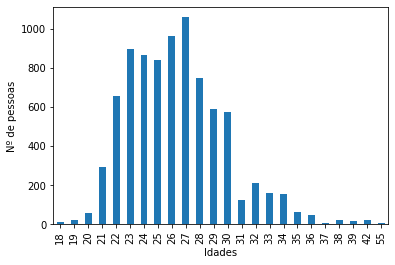

In [129]:
pima['age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Idades")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos o objetivo principal ao participar no evento


Text(0, 0.5, 'Nº de pessoas')

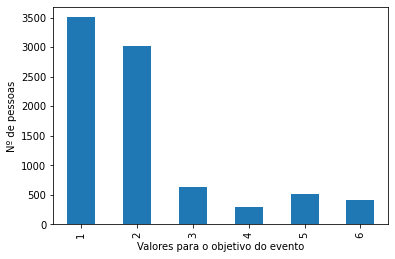

In [130]:
pima['goal'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Valores para o objetivo do evento")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos a frequência que sai para encontros

Text(0, 0.5, 'Nº de pessoas')

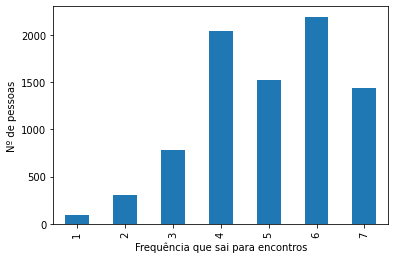

In [131]:
pima['date'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Frequência que sai para encontros")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos a frequência que sai


Text(0, 0.5, 'Nº de pessoas')

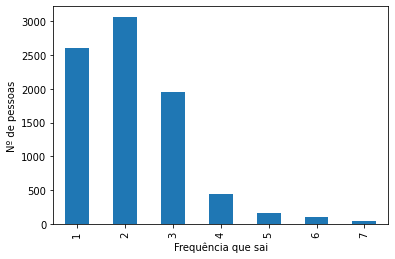

In [132]:
pima['go_out'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Frequência que sai")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos a avaliação do tempo do evento


Text(0, 0.5, 'Nº de pessoas')

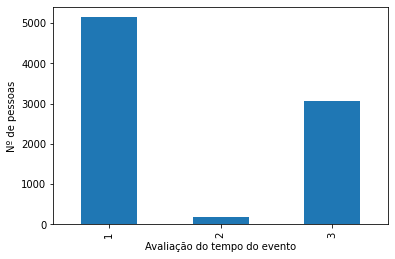

In [133]:
pima['length'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Avaliação do tempo do evento")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos se conhecia o par


Text(0, 0.5, 'Nº de pessoas')

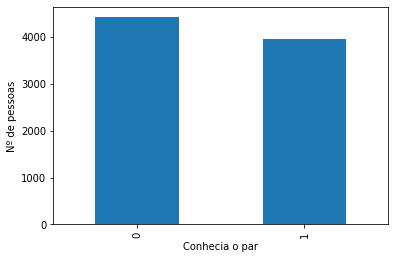

In [134]:
pima['met'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Conhecia o par")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos se gostou do seu par


Text(0, 0.5, 'Nº de pessoas')

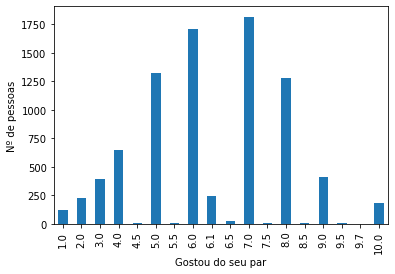

In [135]:
pima['like'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Gostou do seu par")
plt.ylabel("Nº de pessoas")

#Gráfico para estimarmos a probabilidade do seu par ter gostado de si


Text(0, 0.5, 'Nº de pessoas')

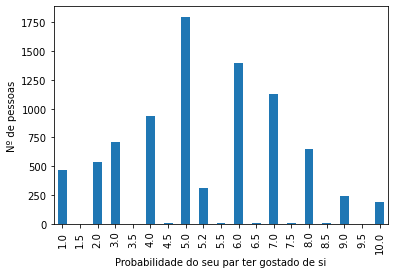

In [136]:
pima['prob'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Probabilidade do seu par ter gostado de si")
plt.ylabel("Nº de pessoas")

#Aqui vamos verificar a quantidade de zeros e uns que existe na coluna match


In [137]:
#numero de 1's
print("% 1's:",pima['match'].mean())
print("% 0's:", 1-pima['match'].mean())


% 1's: 0.16471711625686322
% 0's: 0.8352828837431368


#Confirma se todos os NaN foram preenchidos

In [138]:
pima.isnull().sum()

Unnamed: 0      0
id              0
partner         0
age             0
age_o           0
goal            0
date            0
go_out          0
int_corr      158
length          0
met             0
like            0
prob            0
match           0
dtype: int64

#Confirmar se a tabela foi convertida da maneira que queríamos


In [139]:
pima.head(10)


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1,1,21,27,2,7,1,0.14,2,1,7.0,6.0,0
1,2,1,2,21,22,2,7,1,0.54,2,1,7.0,5.0,0
2,3,1,3,21,22,2,7,1,0.16,2,1,7.0,5.2,1
3,4,1,4,21,23,2,7,1,0.61,2,1,7.0,6.0,1
4,5,1,5,21,24,2,7,1,0.21,2,1,6.0,6.0,1
5,6,1,6,21,25,2,7,1,0.25,2,1,6.0,5.0,0
6,7,1,7,21,30,2,7,1,0.34,2,1,6.0,5.0,0
7,8,1,8,21,27,2,7,1,0.50,2,0,6.0,7.0,0
8,9,1,9,21,28,2,7,1,0.28,2,1,7.0,7.0,1
9,10,1,10,21,24,2,7,1,-0.36,2,1,6.0,6.0,0


#Depois de fazermos isto e de interpretar o nosso conjunto de dados, verificamos que a coluna __int_corr__ não seria relevante para avaliação dos modelos, porque não iria influenciar em nada no processo de matching;

In [140]:
pima = pima.drop('int_corr',1)


#Divisão dos casos variável objetivo com os restantes e o split do conjunto de dados em casos teste e treino


In [141]:

#divisao do casos em q tem match e os q n tem match
resultados = pima['match']
dados = pima.drop(['match'],axis=1)


# Separa o nosso conjunto de dados em treino e teste (30%/70%)
dados_treino, dados_teste, resultados_treino, resultados_teste= train_test_split( dados, resultados, test_size=0.3,random_state=1)

#ID3 COM ENTROPIA


##Método Holdout


###Aplicação, treino e predict do ID3


In [142]:

#modelo a aplicar (ID3)
clf = DecisionTreeClassifier(criterion="entropy")

#treina o nosso modelo
clf = clf.fit(dados_treino, resultados_treino)

#dá uma previsão 
predicted_test = clf.predict(dados_teste)

###Apresentação da Accuracy do modelo, da sua matriz de confusão e o seu classification report


In [143]:
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted_test))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, clf.predict(dados_teste)))

print("Classification Report:\n",classification_report(resultados_teste, clf.predict(dados_teste)))


Accuracy: 0.7923627684964201
Matriz de confusão:
 [[1830  277]
 [ 245  162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      2107
           1       0.37      0.40      0.38       407

    accuracy                           0.79      2514
   macro avg       0.63      0.63      0.63      2514
weighted avg       0.80      0.79      0.80      2514



##Método Validação Cruzada (Cross-Validation)


###Vamos dividir o nosso conjunto de dados em 10 e cada uma das partições vai ser testada como teste e as restantes como treino.
###Apresentação da Accuracy de todas as partições, a média dessas Accuracies, matriz de confusão de cada partição e soma total das matrizes de confusão

In [144]:
#divide o nosso conjunto de dados em 10
kf = KFold(n_splits=10,shuffle=False)
kf.split(dados)

scores=cross_val_score(DecisionTreeClassifier(criterion="entropy"), dados, resultados, cv=10, scoring='accuracy')
print("Cross Validation:\n", scores)
print("A média para Cross-Validation do K-fold é: {}".format(scores.mean()),"\n")

# Inicializa o array a zero que vai guardar a nossa matriz de confusão
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# para cada split train test vai treinar, prever e fazer a matriz de confusão
for train_index, test_index in kf.split(dados):
    # split train test
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # treina o modelo
    model = clf.fit(dados_treino, resultados_treino)
    # calcula a matriz de confusão
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # soma as matrizes de confusões
    array = array + c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation:
 [0.70167064 0.67064439 0.68377088 0.61097852 0.73866348 0.71957041
 0.76849642 0.58711217 0.73835125 0.77538829]
A média para Cross-Validation do K-fold é: 0.6994646467238661 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[548 161]
 [ 79  50]]
[[585  93]
 [114  46]]
[[520 157]
 [ 96  65]]
[[570 136]
 [ 90  42]]
[[622  86]
 [102  28]]
[[561 167]
 [ 74  36]]
[[602  87]
 [109  40]]
[[533 148]
 [ 98  59]]
[[584 121]
 [103  29]]
[[630  87]
 [ 93  27]]

 SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[5755 1243]
 [ 958  422]] 



#NAIVE BAYES


##Método Holdout


###Implementação do Gaussian Naive Bayes


In [145]:

#Chama o modelo Gaussian
gnb = GaussianNB()

#treina o modelo
gnb.fit(dados_treino,resultados_treino)

#dá uma previsão
predicted3 = gnb.predict(dados_teste)



###Apresentação da Accuracy, matriz de confusão e classification report


In [146]:
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted3))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, gnb.predict(dados_teste)))

print("Classification Report:\n",classification_report(resultados_teste, gnb.predict(dados_teste)))


Accuracy: 0.8661887694145759
Matriz de confusão:
 [[709   8]
 [104  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       717
           1       0.67      0.13      0.22       120

    accuracy                           0.87       837
   macro avg       0.77      0.56      0.57       837
weighted avg       0.84      0.87      0.83       837



##Método Validação Cruzada (Cross-Validation)


###Vamos dividir o nosso conjunto de dados em 10 e cada uma das partições vai ser testada como teste e as restantes como treino.
###Apresentação da Accuracy de todas as partições, a média dessas Accuracies, matriz de confusão de cada partição e soma total das matrizes de confusão

In [147]:
#divide o nosso conjunto de dados em 10
kf = KFold(n_splits=10,shuffle=False)
kf.split(dados)

scores=cross_val_score(GaussianNB(), dados, resultados, cv=10, scoring='accuracy')
print("Cross Validation:\n", scores)
print("A média para Cross-Validation do K-fold é: {}".format(scores.mean()),"\n")

# Inicializa o array a zero que vai guardar a nossa matriz de confusão
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# para cada split train test vai treinar, prever e fazer a matriz de confusão
for train_index, test_index in kf.split(dados):
    # split train test
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
     # treina o modelo
    model = gnb.fit(dados_treino, resultados_treino)
    # calcula a matriz de confusão
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # soma as matrizes de confusões
    array = array + c
print("\n SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:\n",array,"\n")

Cross Validation:
 [0.79713604 0.81980907 0.849642   0.78639618 0.83651551 0.81742243
 0.85441527 0.79713604 0.8255675  0.84348865]
A média para Cross-Validation do K-fold é: 0.8227528706626405 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[614  95]
 [ 69  60]]
[[644  34]
 [123  37]]
[[641  36]
 [104  57]]
[[610  96]
 [ 86  46]]
[[689  19]
 [112  18]]
[[692  36]
 [ 97  13]]
[[676  13]
 [119  30]]
[[610  71]
 [104  53]]
[[666  39]
 [109  23]]
[[709   8]
 [104  16]]

 SOMA DA MATRIZ DE CONFUSÃO DE TODOS OS K-FOLD:
 [[6551  447]
 [1027  353]] 



##Curva de aprendizagem para o Gaussian Naive Bayes com o método Cross-Validation


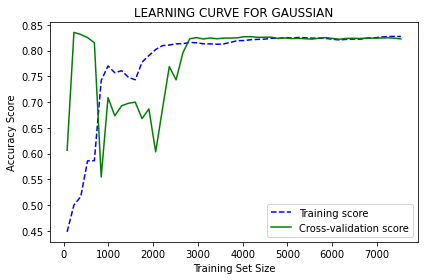

In [148]:
# cv é o número de folds enquanto faz Cross-Validation
sizes, training_scores, testing_scores = learning_curve(GaussianNB(), dados, resultados, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Média e desvio padrão do score do treino
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Média e desvio padrão do score do teste
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# azul trajecado é para os valores de treino e a linha verde para o valor cross.-validation
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Desenha gráfico
plt.title("LEARNING CURVE FOR GAUSSIAN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()